# Project: Optimization of the geometry of a 4 DoF robotic Manipulator
##  Course: Artificial Intelligence (MT8008)
### Author: Andrés Jiménez Mora

# Description

This notebook shows a *sample* of the final project carried out for the elective class "Artificial Intelligence", on the topic evolutionary computing.

# Objective

The aim is to optimize the length of the arms of a 4 DoF robotic manipulator so that the angular distance traveled between any 2 points of a hemispherical workspace of radius r is minimal.

# Generalities

The diagram of the robotic manipulator is shown below with its respective geometric variables.

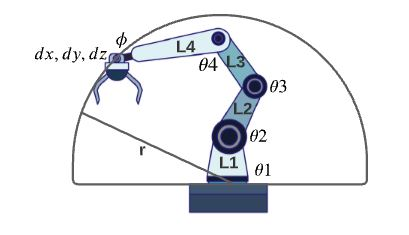

L1, L2, L3 and L4 being the lengths of the segments of the robotic manipulator; θ1, θ2, θ3 and θ4 represent the angular displacements, measured from the positive X axis, of the joints: ϕ corresponds to the angular displacement/orientation of the effector. The points dx, dy and dz represent the coordinates of the end point of the effector. Finally, r corresponds to the radius of the hemispherical workspace of the manipulator.

To determine the general behavior of the system, several references on modeling a 4 DoF robotic arm through the algebraic solution were consulted. Based on [1] and [2] the following equations were obtained for the angles of the joints:

$$
    \theta_{1} = tan^{-1}(\frac{dy}{dx})
$$

$$
    \theta_{2} = tan^{-1}(c,\pm\sqrt{g^2-c^2})-tan^{-1}(a,b)
$$

$$
     \theta_{3} = cos^{-1}(\frac{A^2+B^2+C^2-L2^2-L3^2}{2*L2*L3})
$$

$$
     \theta_{4} = \phi - \theta_{2} - \theta_{3}
$$

Where:

$$
    a = l_{3}sin(\theta_{3})
$$

$$
    b = l_{2}+l_{3}cos(\theta_{3})
$$

$$
    c = dz - l_{1} - l_{4}sin(\phi)
$$

$$
    g = \sqrt{a^2+b^2}
$$

$$
    A = dx - l_{4}cos(\theta_{1})cos(\phi)
$$

$$
    B = dy - l_{4}sin(\theta_{1})cos(\phi)
$$

$$
        C= dz - l_{1} - l_{4}sin(\phi)
$$

Furthermore, once the angles θ2, θ3 and θ4 are obtained, the value of ϕ can be obtained, where ϕ corresponds to the orientation of the effector, through the following equation:

$$
    \phi = \theta_{2} + \theta_{3} + \theta_{4}
$$

Finally, a restriction is established based on the radius of the work area:

$$
    r = \sqrt{dx^2+dy^2+dz^2}
$$

### Simplifications of the mathematical model


The aim of this problem is to look for arm lengths such that the angular movement between two points is the minimum. There is a specific angle that is not affected by the lengths, which is the angle $\theta_{1}$. This angle is only affected by the final position of the effector. For this reason, the angle $\theta_{1}$ will be taken constant, which simplifies the model from a hemisphere to a plane as shown in the following figure.

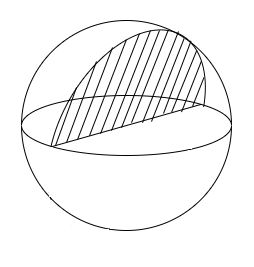

However, after performing experimental calculations it was observed that the points that were in the first and second quadrants of the positive or negative X axis are the same. This further simplifies the system to a quarter-circle shaped plane, as it is shown below.

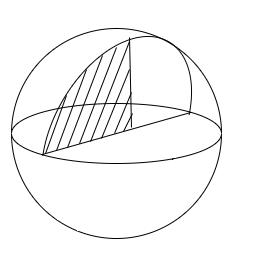



Finally, the previous equations reduce to the following:

$$
    \theta_{1} = 0
$$

$$
    \theta_{2} = tan^{-1}(c,\pm\sqrt{g^2-c^2})-tan^{-1}(a,b)
$$

$$
     \theta_{3} = cos^{-1}(\frac{A^2+C^2-L2^2-L3^2}{2*L2*L3})
$$

$$
     \theta_{4} = - (\theta_{2} + \theta_{3})
$$

Additionally, 

$$
    a = l_{3}sin(\theta_{3})
$$

$$
    b = l_{2}+l_{3}cos(\theta_{3})
$$

$$
    c = dz - l_{1} 
$$

$$
    g = \sqrt{a^2+b^2}
$$

$$
    A = dx - l_{4}
$$


$$
        C= dz - l_{1}
$$


# Solution

## Definition of genotype and phenotype

To define the genotype it is necessary to define the structure of the chromosomes that will be generated for this problem. Since the length of the arms needs to be optimized, each gene on the chromosome can be associated with a length:

$$
    Cromosom  [L_{1}, L_{2}, L_{3}, L_{4}]
$$

The phenotype will be the robotic arm, with a specific performance according to the length of the arms given by a specific chromosome.

## Definition of the alleles

To define the allele space, restrictions on the domains of functions and arm lengths will be determined. Starting with the domain restrictions of the function acos(x):

$$
    -1\leq(\frac{A^2+C^2-L2^2-L3^2}{2*L2*L3})\leq1
$$

Implying that:

$$
    -2*L2*L3\leq A^2+C^2-L2^2-L3^2\leq2*L2*L3 \quad (1)
$$

Regarding the restrictions for the domain of the atan2 function, we have to:

$$ 
    If \quad c = 0 \quad  \Rightarrow \quad \sqrt{g^2-c^2} \neq 0  \quad (2)
$$

$$
    If \quad a = 0 \quad  \Rightarrow \quad b \neq 0  \quad (3)
$$

Regarding the lengths, it is important to establish certain limitations to facilitate finding solutions:

$$
    L_{1} + L_{2} + L_{3} + L_{4} >= r \quad (4)
$$

$$
    L_{1} + L_{2} + L_{3} + L_{4} <=2r \quad (5)
$$

$$
   L_{n} < r/3 \quad (6)
$$

$$
   L_{n} >= r/10  \quad (7)
$$


Based on the previous restrictions, an allele space is proposed for the problem.

$$
  r/10 <= L_{n} <= r/3
$$

## Definition of the quality function

In order to simplify the quality function and save computational cost, the displacements will be evaluated in a two dimensional quarter of circle. This simplification is possible given that its joints, with the exception of θ1, can only rotate in a planar manner and therefore, to perform three-dimensional movements it must rotate about the z axis and then rotate the rest of the joints. First, the angular distance traveled by the robot's joints when moving between any 2 points in space will be defined. Given points P1 and P2:

$$
    P_{1} = (x_{1}, z_{1})
$$

$$
    P_{2} = (x_{2}, z_{2})
$$

Such that:

$$
    \sqrt{x_{1}^2+z_{1}^2} = r
$$

$$
    \sqrt{x_{2}^2+z_{2}^2} = r
$$

Evaluating the previous points in the inverse kinematics equations, 2 sets of angles for the joints at each point are obtained:

$$
    \theta_{P1} ( \theta_{P1,1},  \theta_{P1,2},  \theta_{P1,3},  \theta_{P1,4} )
$$

$$
    \theta_{P2} ( \theta_{P2,1},  \theta_{P2,2},  \theta_{P2,3},  \theta_{P2,4} )
$$

The angular distance is obtained by calculating the difference between each angle of each joint:

$$
    \theta_{\delta} ( \theta_{P2.1}-\theta_{P1.1}, \theta_{P2.2}-\theta_{P1.2},  \theta_{P2.3}-\theta_{P1.3}, \theta_{P2.4}-\theta_{P1.4} )
$$


N points will be generated on a quarter of a circle fixed in the XZ plane, the angular distance between each of the M possible combinations of 2 points will be calculated and therefore, a quality function can be obtained. Additionally, the restrictions set out above are used as a punishment factor.

$$
    Quality = \frac{1}{\sum_{i=1}^N\sum_{j=1}^M{|\theta_{\delta_{i}}|}}
$$

In the event that conditions (4) or (5) are not met, a punishment factor is added. On the other hand, these will become 1 when the conditions are met:

$$
    Quality = \frac{1}{\sum_{i=1}^N\sum_{j=1}^M{|\theta_{\delta_{i}}|}} * (\frac{ L_{1} + L_{2} + L_{3} + L_{4}}{1000r^2})*(\frac{1}{(l1+l2+l3+l4 - 2*radius)^2*1000})
$$

## Coding

In [23]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from queue import Queue
import random 
import math

###  Input the radius of the work area

In [24]:
radio = int(input("Specify the radius of the work area in m: "))

Specify the radius of the work area in m: 5


### Calculate the angles of the joints for 25 points on a quarter circle

In the following function, 25 points are generated that meet the working radius condition. Based on these points, the angles for each joint of the manipulator are calculated when these coordinates are reached.

In [25]:
def angulos_finales(parametros_sys):
    
    l1= parametros_sys[0]
    l2= parametros_sys[1]
    l3= parametros_sys[2] 
    l4= parametros_sys[3]
    
    x= np.linspace(0, radio, 25)
    z=[]
    
    angulos= [[],[],[]]
    for i in range(0, len(x)):
        
        zi=math.sqrt((radio**2)-(x[i]**2))
        z.append(zi)
        A = x[i]-l4
        C = zi-l1
        c = zi -l1
        theta1 = 0
        
        
        theta3 = math.acos(((A**2)+(C**2)-(l2**2)-(l3**2))/(2*l2*l3))
        a = l3*math.sin(theta3)
        b = l2 + l3*math.cos(theta3)
        g = math.sqrt((a**2) + (b**2))
        theta2 = math.atan2(c,(-1*math.sqrt((g**2)-(c**2))))-math.atan2(a,b)
        theta4 = -(theta2 + theta3)
        
        angulos[0].append(theta2)
        angulos[1].append(theta3)
        angulos[2].append(theta4)
        
    return angulos
    
    

### Quality function and testing system

The quality function previosly defined is now implemented.

In [26]:
def fitness_func(solutions_array, solutions__array_idx):
    l1, l2, l3, l4 = solutions_array
    
    try: 
        fit = 0    # calidad de la respuesta
        angulos = angulos_finales(solutions_array)  # llamada a angulos finales

        sumatoria2 = 0 
        sumatoria3 = 0 
        sumatoria4 = 0 

        for i in range(len(angulos[0])-1):
            suma2 = 0
            suma3 = 0
            suma4 = 0
            for j in range(i+1, len(angulos[0])):

                suma2 = suma2 + abs(angulos[0][i]-angulos[0][j])
                suma3 = suma3 + abs(angulos[1][i]-angulos[1][j])
                suma4 = suma4 + abs(angulos[2][i]-angulos[2][j])


            sumatoria2 = sumatoria2 + suma2 
            sumatoria3 = sumatoria3 + suma3
            sumatoria4 = sumatoria4 + suma4

        sumatoria = sumatoria2 + sumatoria3 + sumatoria4
        #angulos_generacion.append(sumatoria) # se añade la suma de todos los angulos a la lista angulos_generacion
        
        if(l1<0.1*radio or l2<0.1*radio or l3<0.1*radio or l4<0.1*radio ):
            castigo = 0.00000001
            
        elif(l1>0.65*radio or l2>0.65*radio or l3>0.65*radio or l4>0.65*radio ):
            castigo = 0.00000001

        elif (l1+l2+l3+l4 >= radio and l1+l2+l3+l4 <= 2*radio):

            castigo=1

        elif(l1+l2+l3+l4 < radio): 

            castigo = (l1+l2+l3+l4)/(1000*radio**2)
        else:
            castigo = 1/(((l1+l2+l3+l4 - 2*radio)**2)*1000)

        fit=castigo*(1/sumatoria)
        return fit
    
    except:
        fit=0.00000000001
        return fit
        
   


### Function to calculate the sum of the angular distances of the best solution

To validate the results, a graph of "Sum of angular distances" vs "Generations" is made at the end of the execution of the algorithm. This function is responsible for generating a 1D list with the sum of the angular distances of the best solution to serve as the Y axis of the final graph.

In [27]:
angulos_generacion = []

def mejor_angulo(solutions_array):
    try: 
    
        angulos = angulos_finales(solutions_array)  # llamada a angulos finales

        sumatoria2 = 0 
        sumatoria3 = 0 
        sumatoria4 = 0 

        for i in range(len(angulos[0])-1):
            suma2 = 0
            suma3 = 0
            suma4 = 0
            for j in range(i+1, len(angulos[0])):

                suma2 = suma2 + abs(angulos[0][i] - angulos[0][j])
                suma3 = suma3 + abs(angulos[1][i] - angulos[1][j])
                suma4 = suma4 + abs(angulos[2][i] - angulos[2][j])


            sumatoria2 = sumatoria2 + suma2 
            sumatoria3 = sumatoria3 + suma3
            sumatoria4 = sumatoria4 + suma4

        sumatoria = sumatoria2 + sumatoria3 + sumatoria4
        angulos_generacion.append(sumatoria) # se añade la suma de todos los angulos a la lista angulos_generacion
    except: 
        angulos_generacion.append(0)

### Genetic model parameters

The final parameters of the genetic model were defined after several experiments of variation. The main influence factors were identified as the mutation percent, number of generations and the crossover type. To mantain simplicity, the trial runs will be omitted.

In [28]:
#Se define la función de calidad
fitness_function = fitness_func


sol_per_pop = 50  # población inicial (cromosomas)
num_genes = 4   # numero de genes (cantidad de constantes de la ecuación)

num_generations = 200  # numero de generaciones creadas
num_parents_mating = int(sol_per_pop*0.25) #int(sol_per_pop*0.25)  # Porcentaje de padres para recombinacion (25%)

init_range_low = radio/10 #límite inferior rango alelos
init_range_high = (radio/3) # limite superior rango alelos

parent_selection_type = "rws"  # el tipo de selección rws es por ruleta
keep_parents =  int(sol_per_pop*0.25)  # cantidad de padres que permanecen en cada generación 

crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 2

fit_queue = Queue(maxsize = 30) # Cola en la que se almacenan ultimos 10 resultados 

### Callback Section

The stopping criterion of the algorithm is based on waiting for the quality to stop changing, which means that the
optimization has reached its limit. For the implementation, a FIFO type list was defined where the the last 20 fitness results, when the list is full of results equal to each other, throw the "stop" at the genetic algorithm to finish the execution and show the best solution achieved.

In [29]:
last_fitness =0
numero_generacion = []
calidad_generacion = []

def all_equal(iterable): # funcion que revisa si todos los numeros que le entran son iguales
    g = groupby(iterable)
    return next(g, True) and not next(g, False)

def callback_generation(ga_instance): # Función Callback
    global last_fitness
    # acá se imprimen los datos de la generación y el mejor resultado
    
    #print("Generation = {generation}".format(generation=ga_instance.generations_completed)) #generacion
    #print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1])) #mejor calidad de la generacion
    #print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness)) #diferencia entre la calidad actual y la anterior
    #print("Best solution: " + str(ga_instance.best_solution()[0]))
    last_fitness = ga_instance.best_solution()[1]
    numero_generacion.append(ga_instance.generations_completed)
    calidad_generacion.append(ga_instance.best_solution()[1])
    mejor_angulo(ga_instance.best_solution()[0])

    if fit_queue.full(): #revision de la cola para averiguar si se cumple la condicion de parada
      fit_queue.get()
      fit_queue.put(last_fitness)
    
      lista = list(fit_queue.queue)
      if all_equal(lista): #revision de que todos los resultados en la lista sean iguales
        print('Las ultimas 30 soluciones son iguales, parando generacion...')
        return 'stop' #senal para que el algoritmo genetico se detenga

    else: #si la cola aun no esta llena
      fit_queue.put(last_fitness) #llenar la cola con el ultimo resultado

### Definition of the evolutionary model

In [30]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation,
                       gene_type=float)

### Best solution

In [39]:
ga_instance.run()
print("\nRobotic manipulator lengths [L1, L2, L3, L4] from the best solution")
print(ga_instance.best_solution()[0])

Las ultimas 30 soluciones son iguales, parando generacion...

Robotic manipulator lengths [L1, L2, L3, L4] from the best solution
[0.50876148 3.23792719 3.24468547 0.51537272]


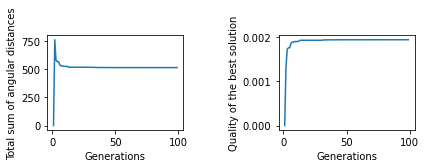

In [32]:
plt.subplot(2,2,1)
plt.plot(numero_generacion, angulos_generacion)
plt.xlabel("Generations")
plt.ylabel("Total sum of angular distances")
plt.title("")

plt.subplot(2,2,2)
plt.plot(numero_generacion, calidad_generacion)
plt.xlabel("Generations")
plt.ylabel("Quality of the best solution")
plt.title("")
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.7, 
                    hspace=0.9)

The graphics above showed how the angular displacements from every joint of the robotic manipulator decreased until its local minimum, implying that the optimization has been achieved for the specified working radius of 5 m. Oppositely, the quality function reached a local maximum of only 0.002, the reason of this lies in the punishment factor added to avoid inconsistent solutions. It can be concluded that the optimization problem was successfully solved by using genetic algorithms.

### Referencias

[1] A. A. Mohammed and M. Sunar, "Kinematics modeling of a 4-DOF robotic arm," 2015 International Conference on Control, Automation and Robotics, 2015, pp. 87-91, doi: 10.1109/ICCAR.2015.7166008.

[2] Y. Luan, W. Xu, J. Li, D. Zhou, H. Wang and H. Ji, "Kinematics Modeling and Simulation of a 4-DOF Manipulator," 2017 International Conference on Computer Systems, Electronics and Control (ICCSEC), 2017, pp. 302-305, doi: 10.1109/ICCSEC.2017.8446769.

[3] A.P. Engelbrecht, '"Computational intelligence: an introduction, second edition,", ed. 2nd ed., 2007.